In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [57]:
import numpy as np 
import pandas as pd
train_data = pd.read_csv ('/kaggle/input/spaceship-titanic/train.csv')
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [58]:
test_data = pd.read_csv ('/kaggle/input/spaceship-titanic/test.csv')
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


<AxesSubplot:xlabel='Transported'>

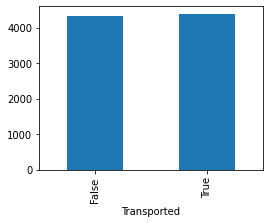

In [59]:
%matplotlib inline
GroupData = train_data.groupby('Transported').size()
GroupData.plot(kind ='bar',figsize =(4,3))

In [60]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [61]:
train_data.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [62]:
UselessColumn = ['RoomService','FoodCourt' ,'ShoppingMall','Spa','VRDeck','Name' ]
train_data = train_data.drop(UselessColumn, axis = 1)
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,True


HomePlanet       categorical --
CryoSleep      categorical --
Cabin          continuous --
Destination     categorical --
Age        continuous --
VIP          categorical

In [63]:

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

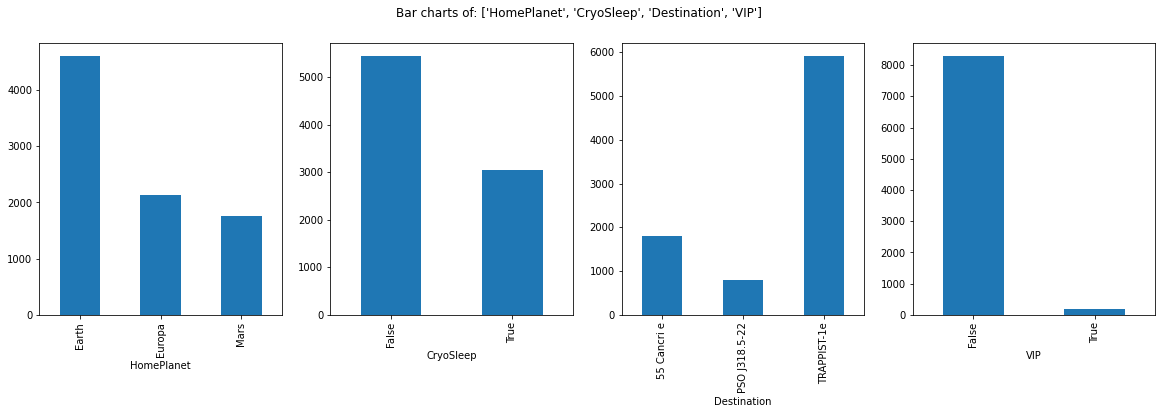

In [64]:
PlotBarCharts(inpData = train_data, colsToPlot= [ 'HomePlanet', 'CryoSleep','Destination','VIP'])

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

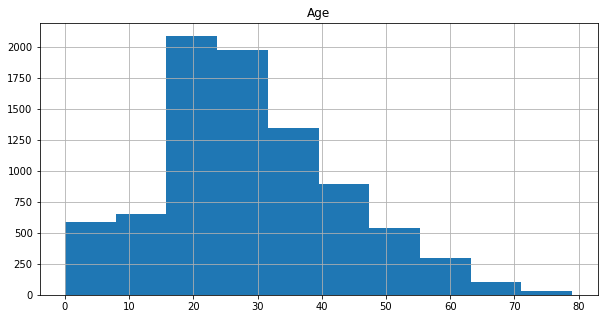

In [65]:
train_data.hist(['Age', 'Cabin'], figsize=(10,5))

In [66]:
train_data.isnull().sum()

PassengerId      0
HomePlanet     201
CryoSleep      217
Cabin          199
Destination    182
Age            179
VIP            203
Transported      0
dtype: int64

In [67]:
train_data['Age'].fillna(train_data['Age'].median(),inplace =True)

In [68]:
train_data.isnull().sum()

PassengerId      0
HomePlanet     201
CryoSleep      217
Cabin          199
Destination    182
Age              0
VIP            203
Transported      0
dtype: int64

In [69]:
train_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0],inplace =True)
train_data['CryoSleep'].fillna(train_data['CryoSleep'].mode()[0],inplace =True)
train_data['Destination'].fillna(train_data['Destination'].mode()[0],inplace =True)

In [70]:
train_data.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin          199
Destination      0
Age              0
VIP            203
Transported      0
dtype: int64

In [71]:
train_data[['Deck', 'Num','Side']] = train_data['Cabin'].str.split('/', expand=True)
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,True,F,1,S


In [72]:
train_data.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin          199
Destination      0
Age              0
VIP            203
Transported      0
Deck           199
Num            199
Side           199
dtype: int64

In [73]:
train_data['Deck'].fillna(train_data['Deck'].mode()[0],inplace =True)
train_data['Num'].fillna(train_data['Num'].mode()[0],inplace =True)
train_data['Side'].fillna(train_data['Side'].mode()[0],inplace =True)
train_data=train_data.drop(['Cabin'],axis=1)
train_data=train_data.drop(['VIP'],axis=1)

In [74]:
train_data.isnull().sum()

PassengerId    0
HomePlanet     0
CryoSleep      0
Destination    0
Age            0
Transported    0
Deck           0
Num            0
Side           0
dtype: int64

In [75]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,Transported,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,True,F,1,S


<AxesSubplot:title={'center':'Age'}, xlabel='Transported'>

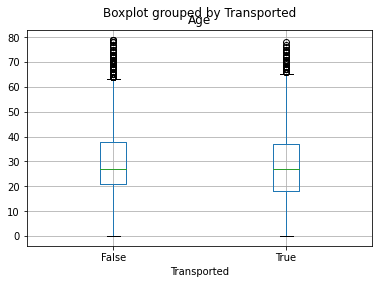

In [76]:
train_data.boxplot('Age','Transported')

<AxesSubplot:xlabel='HomePlanet'>

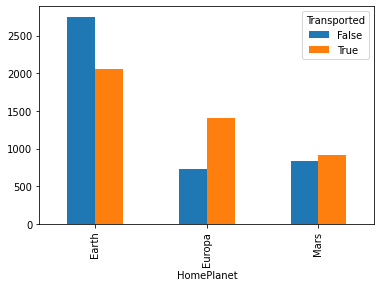

In [77]:
CrossTabResult=pd.crosstab(index=train_data['HomePlanet'], columns=train_data['Transported'])
CrossTabResult.plot.bar()

<AxesSubplot:xlabel='CryoSleep'>

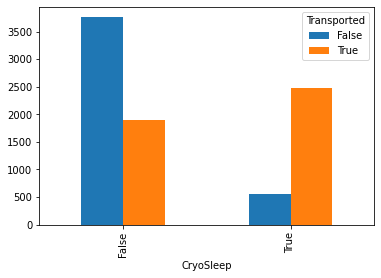

In [78]:
CrossTabResult1=pd.crosstab(index=train_data['CryoSleep'], columns=train_data['Transported'])
CrossTabResult1.plot.bar()

<AxesSubplot:xlabel='Destination'>

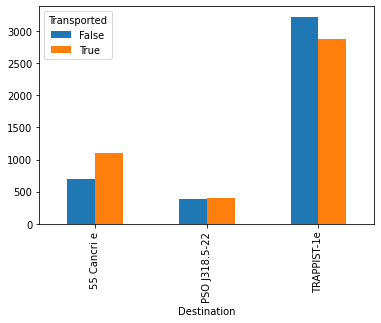

In [79]:
CrossTabResult2=pd.crosstab(index=train_data['Destination'], columns=train_data['Transported'])
CrossTabResult2.plot.bar()

In [80]:
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [81]:
CategoricalVariables=['HomePlanet', 'CryoSleep', 'Destination']


FunctionChisq(inpData=train_data, 
              TargetVariable='Transported',
              CategoricalVariablesList= CategoricalVariables)

HomePlanet is correlated with Transported | P-Value: 5.549631517016864e-70
CryoSleep is correlated with Transported | P-Value: 0.0
Destination is correlated with Transported | P-Value: 1.194789435144493e-23


['HomePlanet', 'CryoSleep', 'Destination']

In [82]:
train_data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,Transported,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,False,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,True,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,E,608,S


In [83]:
train_data.nunique()

PassengerId    8693
HomePlanet        3
CryoSleep         2
Destination       3
Age              80
Transported       2
Deck              8
Num            1817
Side              2
dtype: int64

In [84]:
train_data['CryoSleep'].replace({True:1,False:0},inplace=True)
train_data['HomePlanet'].replace({'Europa':0,'Earth':1,'Mars':2},inplace=True)
train_data['Destination'].replace({'TRAPPIST-1e':0,'PSO J318.5-22':1,'55 Cancri e':2},inplace=True)
train_data['Side'].replace({'P':1,'S':0},inplace=True)
train_data['Deck'].replace({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7},inplace=True)

In [85]:
train_data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,Transported,Deck,Num,Side
0,0001_01,0,0,0,39.0,False,1,0,1
1,0002_01,1,0,0,24.0,True,5,0,0
2,0003_01,0,0,0,58.0,False,0,0,0
3,0003_02,0,0,0,33.0,False,0,0,0
4,0004_01,1,0,0,16.0,True,5,1,0
...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,0,2,41.0,False,0,98,1
8689,9278_01,1,1,1,18.0,False,6,1499,0
8690,9279_01,1,0,0,26.0,True,6,1500,0
8691,9280_01,0,0,2,32.0,False,4,608,0


In [86]:
train_data.drop(['CryoSleep',"Num"],axis=1,inplace=True)
train_data

,PassengerId,HomePlanet,Destination,Age,Transported,Deck,Side
0,0001_01,0,0,39.0,False,1,1
1,0002_01,1,0,24.0,True,5,0
2,0003_01,0,0,58.0,False,0,0
3,0003_02,0,0,33.0,False,0,0
4,0004_01,1,0,16.0,True,5,0
...,...,...,...,...,...,...,...
8688,9276_01,0,2,41.0,False,0,1
8689,9278_01,1,1,18.0,False,6,0
8690,9279_01,1,0,26.0,True,6,0
8691,9280_01,0,2,32.0,False,4,0


In [87]:
x_train=train_data.drop('Transported',axis=1)
y_train=train_data['Transported']

In [88]:
x_train.shape

(8693, 6)

 For test_data

In [89]:
y_train.shape

(8693,)

In [90]:
test_data.shape

(4277, 13)

In [91]:
test_data.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name','VIP'],axis=1,inplace=True)
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0


In [92]:
test_data.shape

(4277, 6)

In [93]:
test_data.isnull().sum()

PassengerId      0
HomePlanet      87
CryoSleep       93
Cabin          100
Destination     92
Age             91
dtype: int64

In [94]:
test_data['HomePlanet'].fillna(test_data['HomePlanet'].mode()[0],inplace=True)
test_data['CryoSleep'].fillna(test_data['CryoSleep'].mode()[0],inplace=True)

test_data[['Deck', 'Num','Side']] = test_data['Cabin'].str.split('/', expand=True)
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,Deck,Num,Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,F,5,S


In [95]:
test_data['Deck'].fillna(test_data['Deck'].mode()[0],inplace=True)
test_data['Side'].fillna(test_data['Side'].mode()[0],inplace=True)
test_data.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin          100
Destination     92
Age             91
Deck             0
Num            100
Side             0
dtype: int64

In [96]:
test_data['Destination'].fillna(test_data['Destination'].mode()[0],inplace=True)
test_data['Age'].fillna(test_data['Age'].median(),inplace =True)
test_data.drop(['Num'],axis=1,inplace=True)


In [106]:
test_data.isnull().sum()

PassengerId      0
HomePlanet       0
Cabin          100
Destination      0
Age              0
Deck             0
Side             0
dtype: int64

In [107]:
test_data.drop(['CryoSleep'],axis=1,inplace=True)
test_data.head()


KeyError: "['CryoSleep'] not found in axis"

In [110]:
test_data.drop(['Cabin'],axis=1,inplace=True)


KeyError: "['Cabin'] not found in axis"

In [111]:
test_data['HomePlanet'].replace({'Europa':0,'Earth':1,'Mars':2},inplace=True)
test_data['Destination'].replace({'TRAPPIST-1e':0,'PSO J318.5-22':1,'55 Cancri e':2},inplace=True)
test_data['Deck'].replace({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7},inplace=True)
test_data['Side'].replace({"P":1,'S':0},inplace=True)

In [112]:
test_data.head()

,PassengerId,HomePlanet,Destination,Age,Deck,Side
0,0013_01,1,0,27.0,6,0
1,0018_01,1,0,19.0,5,0
2,0019_01,0,2,31.0,2,0
3,0021_01,0,0,38.0,2,0
4,0023_01,1,0,20.0,5,0


In [113]:
test_data.skew()

PassengerId    0.001058
HomePlanet     0.020925
Destination    1.196649
Age            0.501441
Deck          -1.022702
Side           0.051005
dtype: float64

In [114]:

x_test=test_data.iloc[:,0:]

In [115]:
x_test

,PassengerId,HomePlanet,Destination,Age,Deck,Side
0,0013_01,1,0,27.0,6,0
1,0018_01,1,0,19.0,5,0
2,0019_01,0,2,31.0,2,0
3,0021_01,0,0,38.0,2,0
4,0023_01,1,0,20.0,5,0
...,...,...,...,...,...,...
4272,9266_02,1,0,34.0,6,0
4273,9269_01,1,0,42.0,5,0
4274,9271_01,2,2,26.0,3,1
4275,9273_01,0,0,26.0,3,1


In [116]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [117]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [118]:
y_pred=model.predict(x_test)


In [119]:
y_pred.shape
model.score(x_test,y_pred)

1.0

In [120]:
from sklearn.svm import SVC
model=SVC(kernel='rbf',random_state=0)
model.fit(x_train,y_train)

SVC(random_state=0)

In [121]:
y_test=model.predict(x_test)
y_test

array([ True,  True,  True, ...,  True,  True,  True])

In [122]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=9, random_state=0)
rf.fit(x_train,y_train)
rf_y_pred = rf.predict(x_test)
rf_y_pred

array([False, False, False, ..., False, False, False])

In [123]:
rf_y_pred.shape

(4277,)

In [124]:
data=pd.DataFrame(rf_y_pred,columns=['Transported'])
data1=pd.DataFrame(test_data.PassengerId)
result=pd.concat([data1,data],axis=1)
result

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [125]:
result.to_csv('Submission.csv',index=False)

In [126]:
result

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False
